In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("D:\heart_disease\Heart Disease\dataset.csv")

In [3]:
print(df.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [4]:
print(df.tail())

      age  sex  chest pain type  resting bp s  cholesterol  \
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189  

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


In [6]:
print(df.describe())

               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636     

In [7]:
print(df.shape)

(1190, 12)


In [8]:
file_path = "D:\heart_disease\Heart Disease\dataset.csv"
data = pd.read_csv(file_path)

# Display the columns of the dataset to find the target column name
print(data.columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [9]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [10]:
df.duplicated().sum()

272

In [11]:
df = df.drop_duplicates()

In [12]:
print(df.shape)

(918, 12)


In [13]:
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column] = data[column].fillna(data[column].median())
    else:
        data[column] = data[column].fillna(data[column].mode()[0])

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the preprocessed dataset
print(data.head())

        age       sex  chest pain type  resting bp s  cholesterol  \
0 -1.466728  0.555995        -1.318351      0.427328     0.775674   
1 -0.504600 -1.798576        -0.248932      1.516587    -0.299512   
2 -1.787437  0.555995        -1.318351     -0.117301     0.716489   
3 -0.611503 -1.798576         0.820487      0.318402     0.035867   
4  0.029915  0.555995        -0.248932      0.971958    -0.151550   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0            -0.520929    -0.802672        1.265039        -0.795219   
1            -0.520929    -0.802672        0.637758        -0.795219   
2            -0.520929     0.346762       -1.636136        -0.795219   
3            -0.520929    -0.802672       -1.244085         1.257515   
4            -0.520929    -0.802672       -0.695214        -0.795219   

    oldpeak  ST slope    target  
0 -0.849792 -1.023217 -1.058873  
1  0.071119  0.615583  0.944400  
2 -0.849792 -1.023217 -1.058873  
3  0.531575  0.6

In [17]:
target_column = 'target'  # Updated to match the actual column name
if target_column not in data.columns:
    raise ValueError(f"The specified target column '{target_column}' is not found in the dataset. Please update the target column name.")

X = data.drop(target_column, axis=1)
y_continuous = data[target_column]


In [18]:
labels = ['low', 'high']
y_categorical = pd.cut(y_continuous, bins=[-0.5, 0.5, 1.5], labels=labels)


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

         low       0.95      0.93      0.94       107
      medium       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238


Confusion Matrix:
[[100   7]
 [  5 126]]


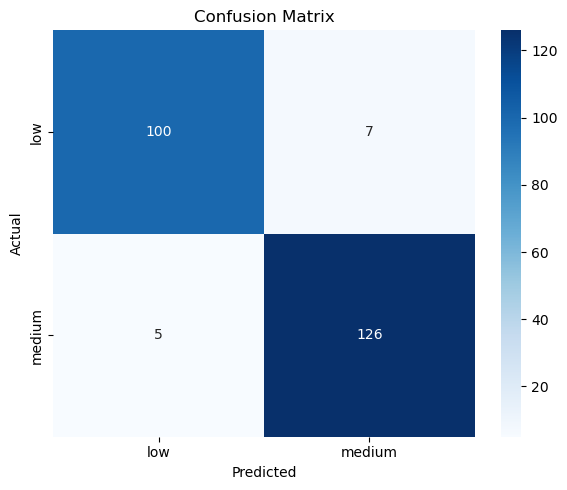


Preprocessing, training, and prediction complete. Data, predictions, and confusion matrix have been saved.


In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Optional: visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Save the preprocessed data and predictions to disk (optional)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
pd.DataFrame(y_pred, columns=['predictions']).to_csv('y_pred.csv', index=False)

print("\nPreprocessing, training, and prediction complete. Data, predictions, and confusion matrix have been saved.")

In [30]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)


SVC(random_state=42)

In [31]:
y_pred = model.predict(X_test)

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

         low       0.93      0.82      0.87       107
      medium       0.87      0.95      0.91       131

    accuracy                           0.89       238
   macro avg       0.90      0.88      0.89       238
weighted avg       0.89      0.89      0.89       238


Confusion Matrix:
[[ 88  19]
 [  7 124]]


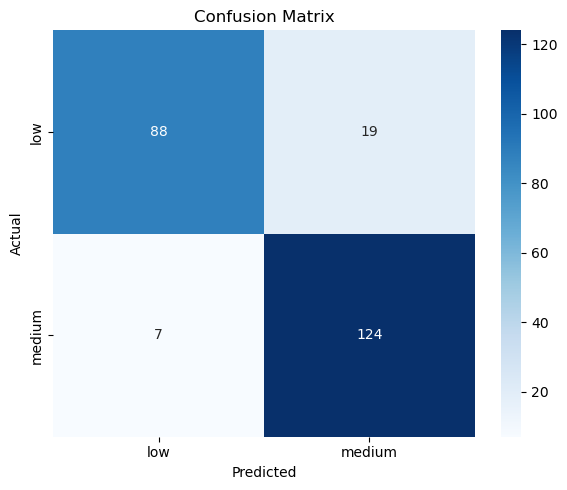


✅ Preprocessing, training, and prediction complete.
Data, predictions, and confusion matrix have been saved.


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 🔷 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Optional: visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Save the preprocessed data and predictions to disk (optional)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
pd.DataFrame(y_pred, columns=['predictions']).to_csv('y_pred.csv', index=False)

print("\n✅ Preprocessing, training, and prediction complete.")
print("Data, predictions, and confusion matrix have been saved.")


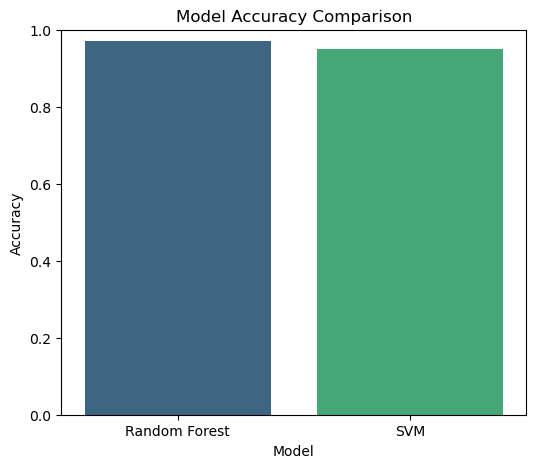

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# example: replace these with your actual scores
rf_accuracy = 0.97  # put your RF accuracy here
svm_accuracy = 0.95  # put your SVM accuracy here

# create a dataframe
df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM'],
    'Accuracy': [rf_accuracy, svm_accuracy]
})

# plot
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Model', y='Accuracy', palette='viridis')
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()
